In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False
weather1 =pd.read_excel('weather2.xlsx')
weather1['日期']=pd.to_datetime(weather1['日期'],errors='coerce')
weather1['年']=weather1['日期'].dt.year
weather1['月']=weather1['日期'].dt.month

weather1=weather1.loc[:,['年','月','日期','天气状况','最大风力(白天)','最小风力(白天)','白天风向','夜间风向','最小风力(夜间)','最大风力(夜间)']]
weather1_year=weather1.groupby('年')
#print(weather1)
print(weather1_year['最大风力(白天)'].describe())
print(weather1_year['最小风力(白天)'].describe())

weather1_year=weather1.groupby('月')

      count      mean       std  min  25%  50%  75%   max
年                                                        
2011  365.0  4.526027  0.712916  3.0  4.0  4.0  5.0   7.0
2012  366.0  4.680328  0.823621  4.0  4.0  4.0  5.0   8.0
2013  365.0  4.375342  0.794172  3.0  4.0  4.0  5.0   8.0
2014  365.0  4.046575  0.822433  3.0  4.0  4.0  4.0  11.0
2015  365.0  3.128767  0.561953  3.0  3.0  3.0  3.0   9.0
2016  365.0  3.043836  0.230257  3.0  3.0  3.0  3.0   5.0
2017  365.0  3.027397  0.163462  3.0  3.0  3.0  3.0   4.0
2018  365.0  2.567123  0.619299  2.0  2.0  3.0  3.0   8.0
2019  365.0  3.123288  1.415623  2.0  2.0  2.0  4.0  11.0
2020  366.0  3.631148  1.194972  2.0  2.0  4.0  4.0  10.0
2021  365.0  3.013699  1.182440  2.0  2.0  2.0  4.0   8.0
      count      mean       std  min  25%  50%  75%   max
年                                                        
2011  365.0  3.515068  0.750764  0.0  3.0  3.0  4.0   6.0
2012  366.0  3.680328  0.823621  3.0  3.0  3.0  4.0   7.0
2013  365.0  3

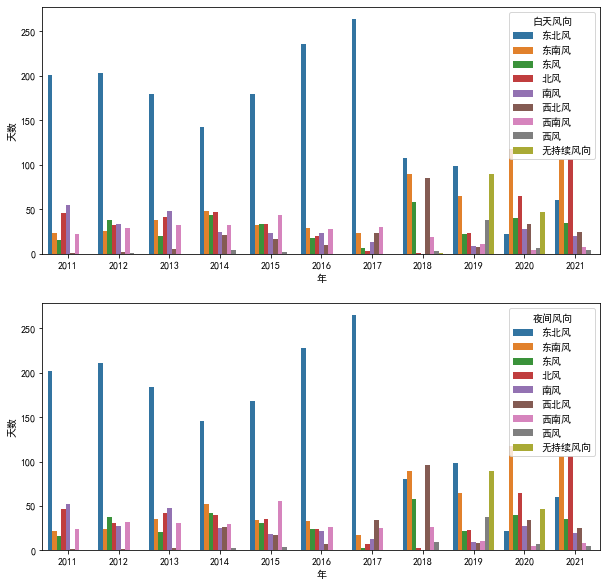

In [2]:
weather2=weather1.groupby(['年','白天风向'])['日期'].count().reset_index().rename(columns={'日期':'天数'})
weather3=weather1.groupby(['年','夜间风向'])['日期'].count().reset_index().rename(columns={'日期':'天数'})
#print(weather2.head())
#print(weather3.head())
p = plt.figure(figsize=(10,10))
ax1 = p.add_subplot(2,1,1)
sns.barplot(x='年',y='天数',hue='白天风向',data=weather2)
ax2 = p.add_subplot(2,1,2)
sns.barplot(x='年',y='天数',hue='夜间风向',data=weather3)
plt.show()

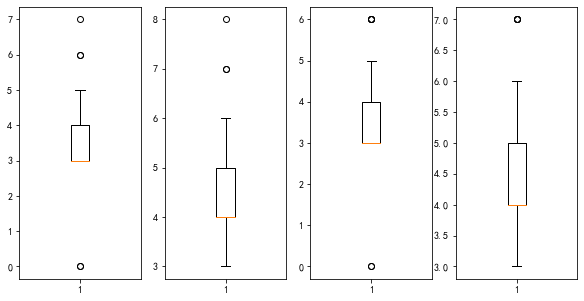

In [3]:
data=weather1[weather1.年==2011]
p = plt.figure(figsize=(10,5))
ax1 = p.add_subplot(1,4,1)
plt.boxplot(data['最小风力(夜间)'])
ax2 = p.add_subplot(1,4,2)
plt.boxplot(data['最大风力(夜间)'])
ax3 = p.add_subplot(1,4,3)
plt.boxplot(data['最小风力(白天)'])
ax4 = p.add_subplot(1,4,4)
plt.boxplot(data['最大风力(白天)'])
plt.show()


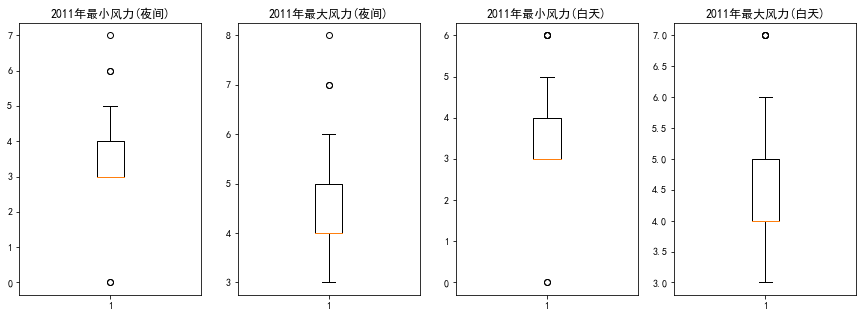

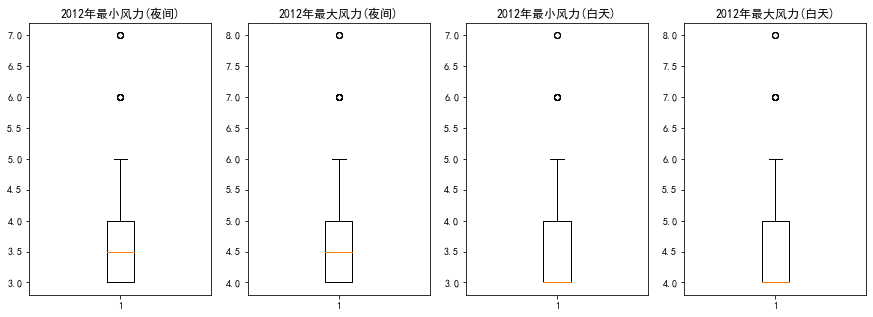

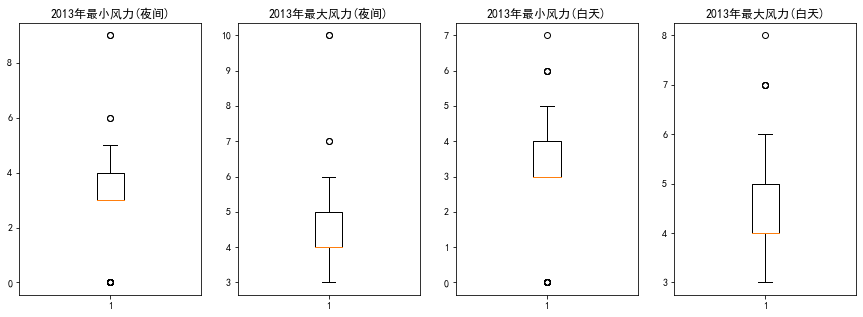

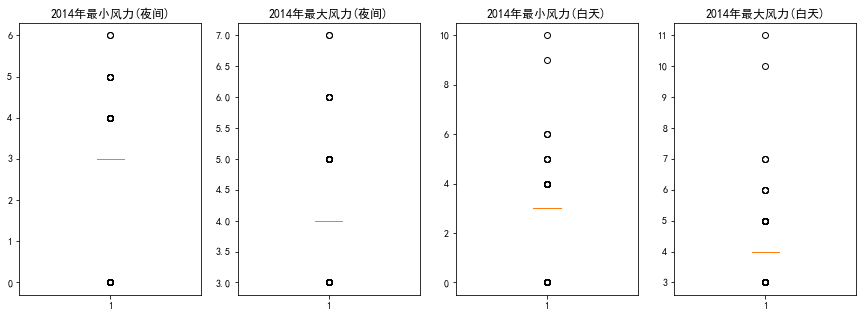

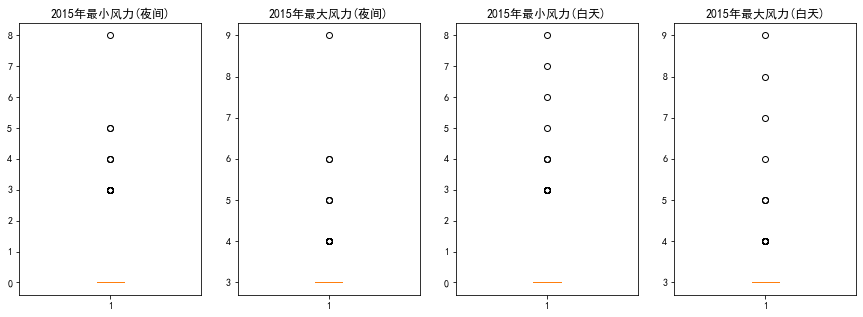

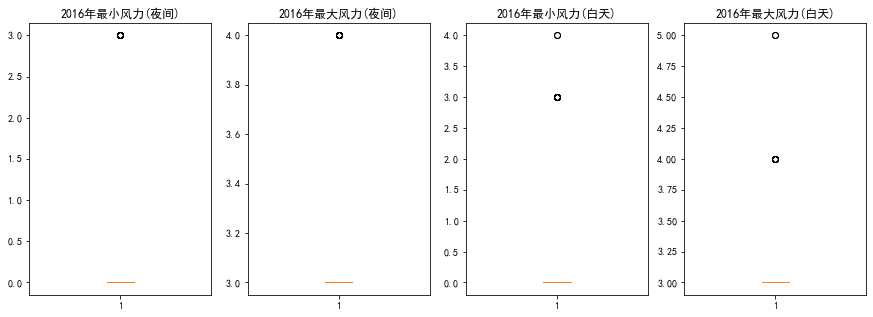

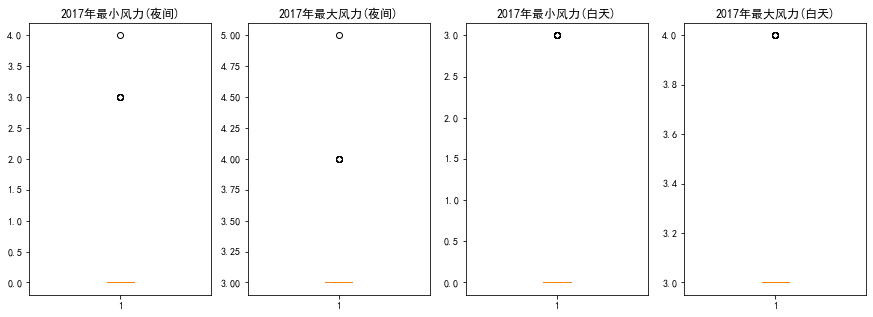

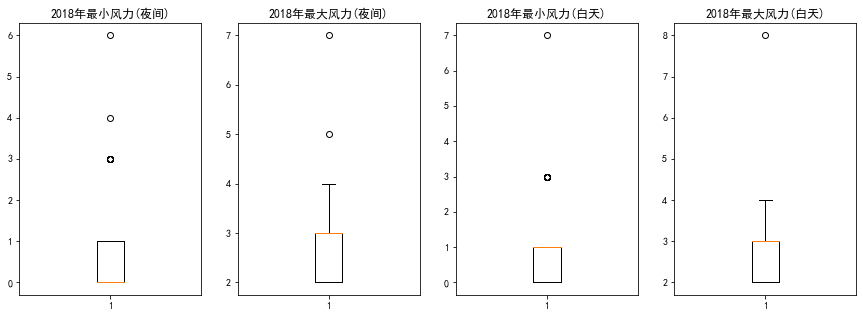

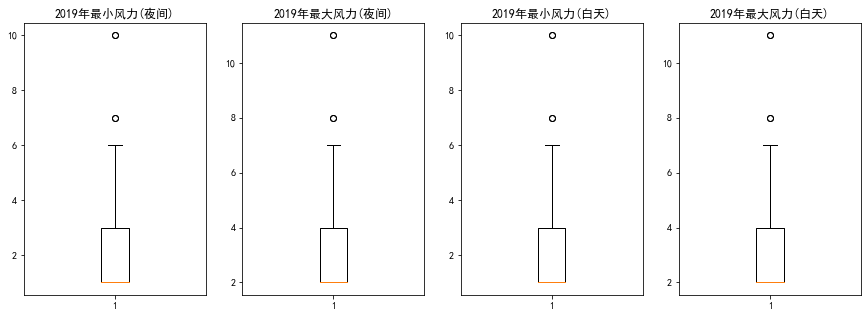

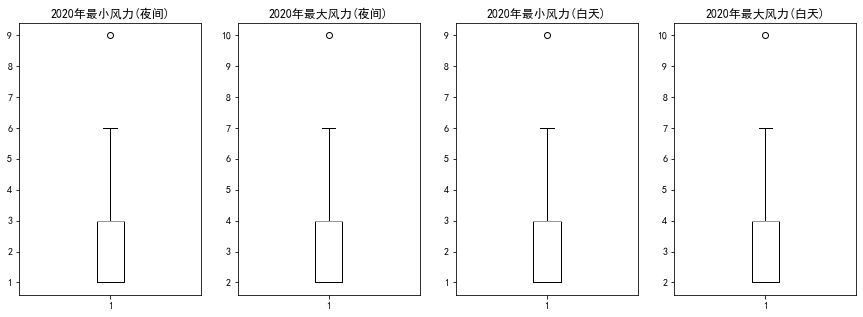

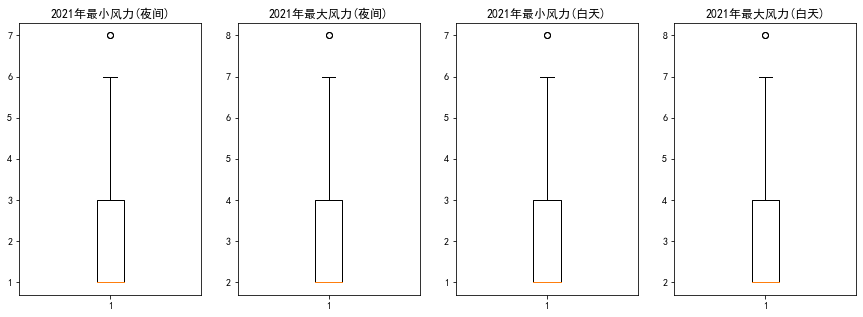

In [5]:
for i in range(2011,2022):
    data=weather1[weather1.年==i]
    p = plt.figure(figsize=(15,5))
    ax1 = p.add_subplot(1,4,1)
    plt.boxplot(data['最小风力(夜间)'])
    plt.title(str(i)+'年最小风力(夜间)')
    ax2 = p.add_subplot(1,4,2)
    plt.boxplot(data['最大风力(夜间)'])
    plt.title(str(i)+'年最大风力(夜间)')
    ax3 = p.add_subplot(1,4,3)
    plt.boxplot(data['最小风力(白天)'])
    plt.title(str(i)+'年最小风力(白天)')
    ax4 = p.add_subplot(1,4,4)
    plt.boxplot(data['最大风力(白天)'])
    plt.title(str(i)+'年最大风力(白天)')
plt.show()

[4.412935323383085, 5.565217391304348, 4.0, 0, 4.454545454545454, 4.218181818181818, 4.25, 4.5625]


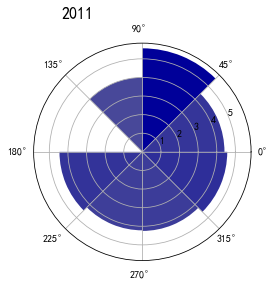

In [4]:
data = pd.read_csv('weather3.csv',encoding='gbk')
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False
def wind_radar(data):
    #风向雷达图
    wind = list(data['白天风向'])
    wind_speed = list(data['最大风力(白天)'])
    for i in range(0,365):
        if wind[i] == "北风":
            wind[i] = 90
        elif wind[i] == "南风":
            wind[i] = 270
        elif wind[i] == "西风":
            wind[i] = 180
        elif wind[i] == "东风":
            wind[i] = 360
        elif wind[i] == "东北风":
            wind[i] = 45
        elif wind[i] == "西北风":
            wind[i] = 135
        elif wind[i] == "西南风":
            wind[i] = 225
        elif wind[i] == "东南风":
            wind[i] = 315
    degs = np.arange(45,361,45)
    temp = []
    for deg in degs:
        speed = []
    # 获取 wind_deg 在指定范围的风速平均值数据
        for i in range(0,4000):
            if wind[i] == deg:
                speed.append(wind_speed[i])
        if len(speed) == 0:
            temp.append(0)
        else:
            temp.append(sum(speed)/len(speed))
    print(temp)
    N = 8
    theta = np.arange(0.+np.pi/8,2*np.pi+np.pi/8,2*np.pi/8)
    # 数据极径
    radii = np.array(temp)
    # 绘制极区图坐标系
    plt.axes(polar=True)
    # 定义每个扇区的RGB值（R,G,B），x越大，对应的颜色越接近蓝色
    colors = [(1-x/max(temp), 1-x/max(temp),0.6) for x in radii]
    plt.bar(theta,radii,width=(2*np.pi/N),bottom=0.0,color=colors)
    plt.title('2011',x=0.2,fontsize=16)
    plt.show()
wind_radar(data)